## 1. Data set review & preparation

In this section we will seek to explore the structure of our data: 
1. To understand the input space the data set
2. And to prepare the sets for exploratory and prediction

In [1]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data frame
df = pd.read_csv(r'D:\Imarticus\Class work\Self Learn projects\Deploy\Churn_Modelling.csv', delimiter=',')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


The Df has 10000 rows with 14 attributes. We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Well isn't that a rare find; no missing values! 

In [6]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

From the above, we will not require the first 2 attributes as the are specific to a customer. It is borderline with the surname as this would result to profiling so we exclude this as well.

In [4]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [5]:
# Review the top rows of what is left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

So we moslty have categorical variables and 5 continuous variables

## 2. Exploratory Data Analysis
Here our main interest is to get an understanding as to how the given attributes relate too the 'Exit' status.

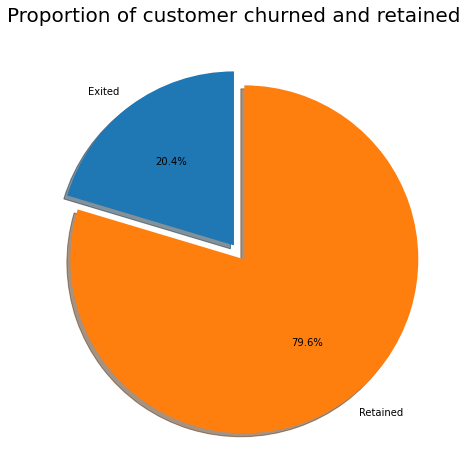

In [8]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn.
Given 20% is a small number,  we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


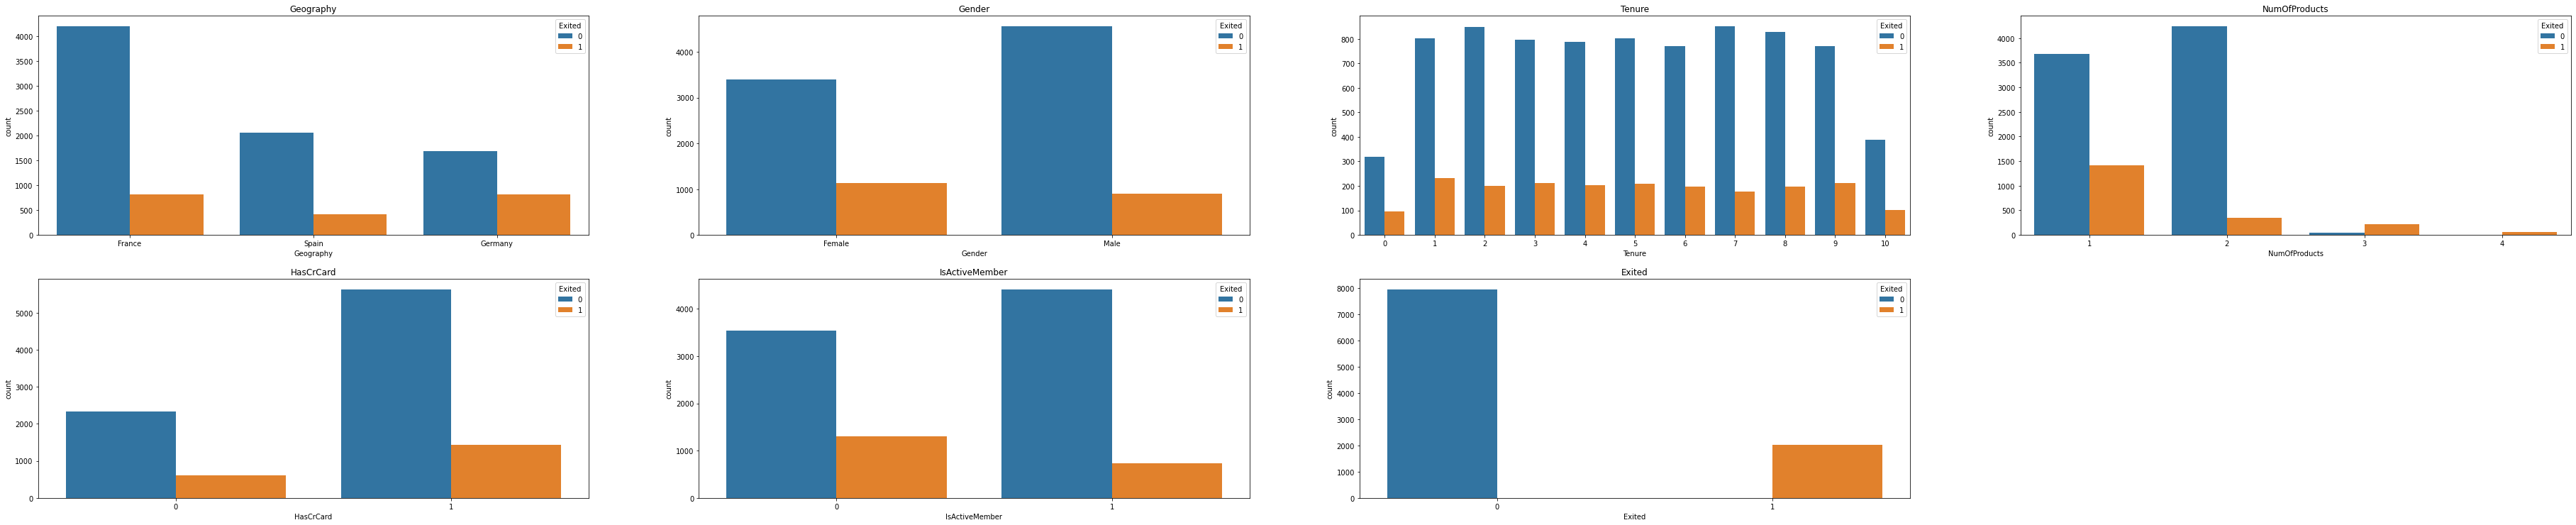

In [9]:
nuniq = df.nunique()
ds = df[[col for col in df if nuniq[col]>1 and nuniq[col]<50]]
nrow, ncol = ds.shape
colname = list(ds)
max_graph = 20
graph_per_row = 4
graph_row = (ncol+graph_per_row-1)/graph_per_row
plt.figure(figsize=(16*graph_per_row,5*graph_row))
for i in range(min(ncol,max_graph)):
    plt.subplot(graph_row,graph_per_row,i+1)
    coldf = ds.iloc[:,i]
    if (not np.issubdtype(type(coldf),np.number)):
        sns.countplot(colname[i],data = ds, hue = 'Exited')
    else:
        coldf.hist()
    plt.title(colname[i])
plt.show()

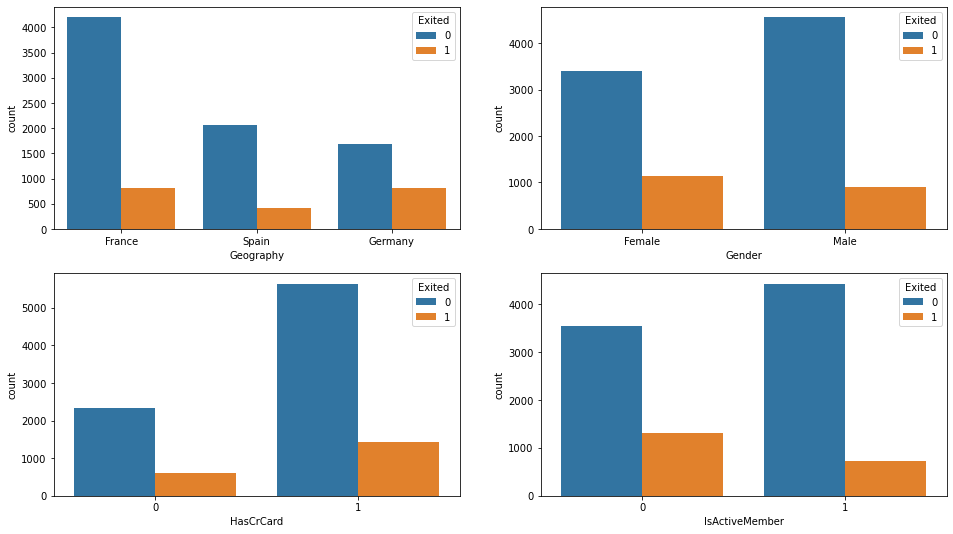

In [21]:
cols = ['Geography', 'Gender','HasCrCard','IsActiveMember']
plt.figure(figsize=(16,9))
for i,j in enumerate(cols):
    plt.subplot(2,2,i+1)
    sns.countplot(x=j,hue='Exited', data =df)
plt.show() 


We note the following:
* Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
* The proportion of female customers churning is also greater than that of male customers
* Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence. 
* Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.


<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

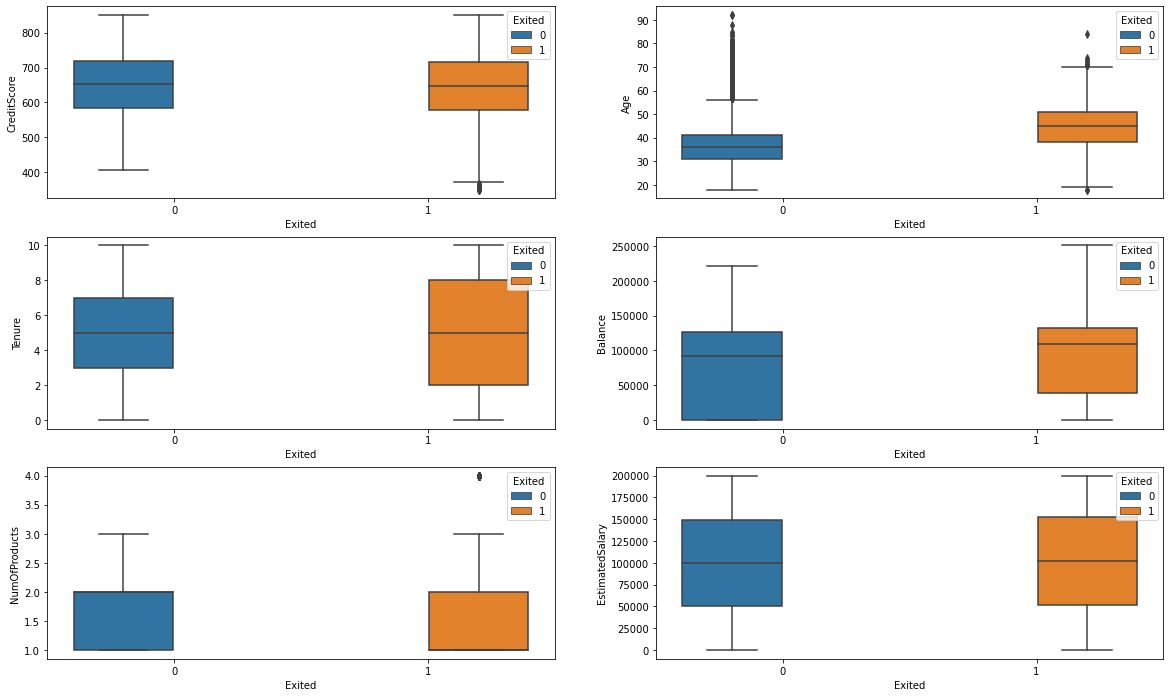

In [27]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

We note the following:
* There is no significant difference in the credit score distribution between retained and churned customers. 
* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
*  Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
* Neither the product nor the salary has a significant effect on the likelihood to churn.

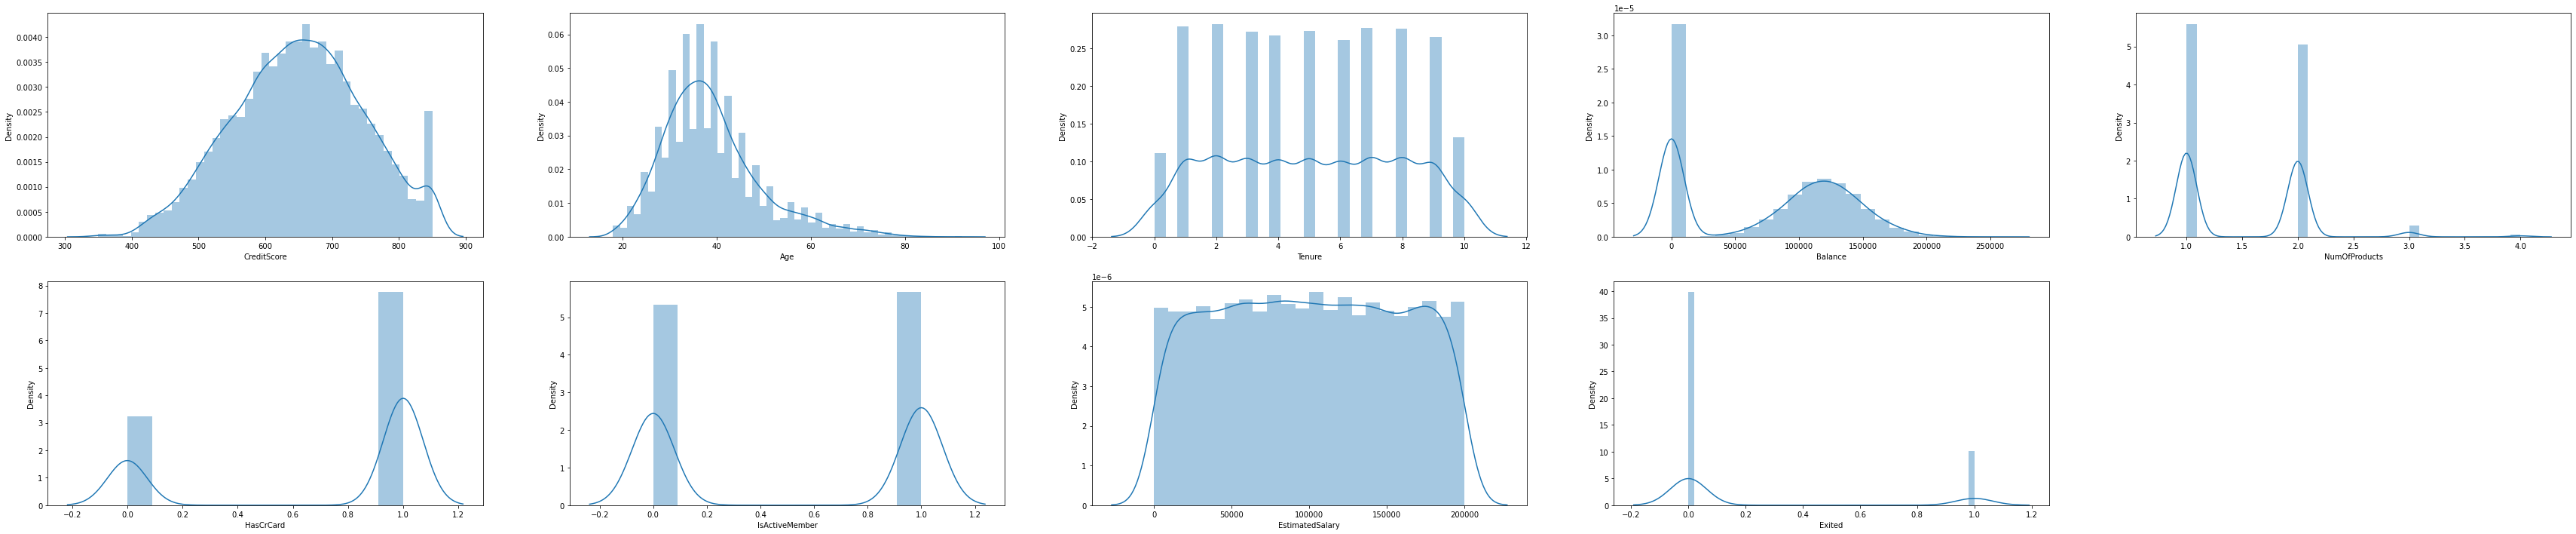

In [48]:
cont_var = df.select_dtypes(exclude='object').columns
nrow = (len(cont_var)+5-1)/5
plt.figure(figsize=(12*5,6*2))
for i,j in enumerate(cont_var):
    plt.subplot(nrow,5,i+1)
    sns.distplot(df[j])
plt.show()

In [50]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data= df.drop(['Exited','Geography','Gender'],1)
vif = pd.DataFrame()
vif['Features']= data.columns
vif['vif']= [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
vif 

,Features,vif
0,CreditScore,20.542767
1,Age,12.284367
2,Tenure,3.864325
3,Balance,2.624526
4,NumOfProducts,7.702215
5,HasCrCard,3.286163
6,IsActiveMember,2.071745
7,EstimatedSalary,3.885144


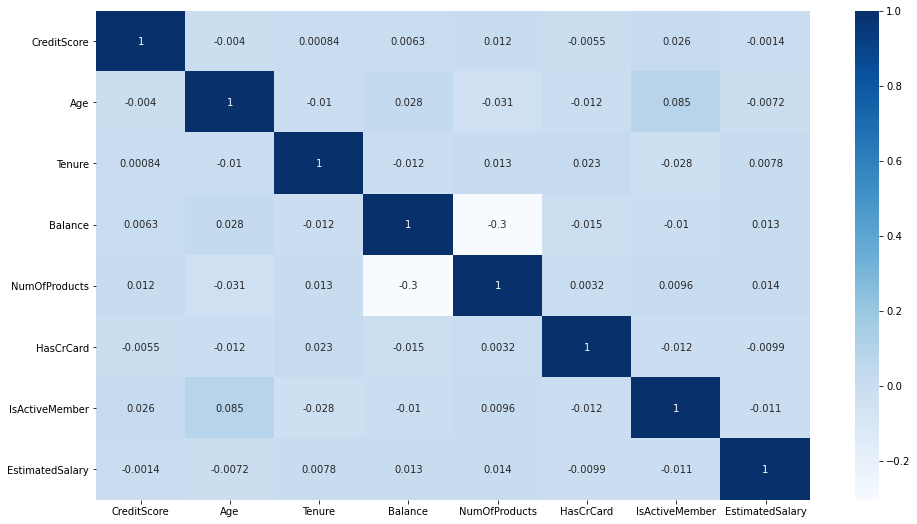

In [55]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr,annot=True, cmap= 'Blues')
plt.show() 


## 3. Data prep for model fitting

In [56]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df1= pd.get_dummies(df,drop_first=True)
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


<AxesSubplot:xlabel='Age', ylabel='Density'>

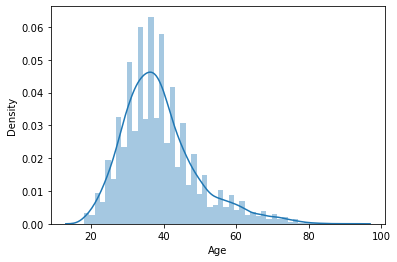

In [66]:
sns.distplot(df1.Age)

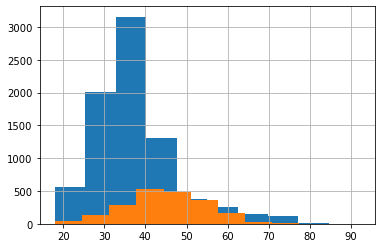

In [67]:
df1.groupby('Exited')['Age'].hist()
plt.show()

In [16]:
x= df1.drop('Exited',1)
y=  df1['Exited']
minVec = x.min().copy()
maxVec = x.max().copy()
x = (x-minVec)/(maxVec-minVec)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,0.0,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0,0.0,1.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,0.0,0.0,0.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0,0.0,1.0


## Model fitting and selection
For the model fitting, I will try out the following
* Logistic regression in the primal space and with different kernels
* SVM in the primal and with different Kernels
* Ensemble models

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import plot_roc_curve,roc_auc_score,roc_curve

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25,random_state=7)

In [79]:
# Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading.
# hence we are using Classification Report and Confusion Matrix
# function for accuracy and confusion matrix
def res(y_test_valid,y_train_valid):
    cm_log = confusion_matrix(y_test,y_test_valid)
    ConfusionMatrixDisplay(cm_log).plot()
    print(classification_report(y_test,y_test_valid))
    print('train_accuracy:',accuracy_score(y_train,y_train_valid))
    print('test_accuracy:',accuracy_score(y_test,y_test_valid))


### Fit best Models

In [ ]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(x_train,y_train)
best_model(log_primal_Grid)

# Output
# 0.815125
# {'C': 100, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
# LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=250, multi_class='warn',
#           n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
#           tol=1e-05, verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1990
           1       0.62      0.21      0.32       510

    accuracy                           0.81      2500
   macro avg       0.72      0.59      0.60      2500
weighted avg       0.78      0.81      0.77      2500

train_accuracy: 0.812
test_accuracy: 0.8124


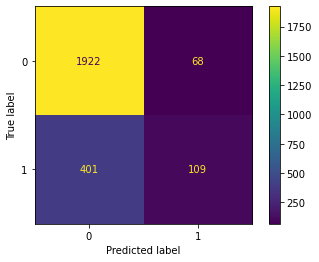

In [82]:
log_model= LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=250,
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=1e-05, verbose=0, warm_start=False)
log_model.fit(x_train,y_train)
y_pred_log = log_model.predict(x_test)
y_pred_train = log_model.predict(x_train)
res(y_pred_log,y_pred_train)

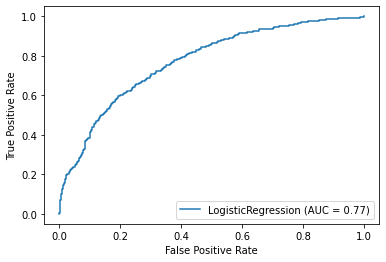

In [83]:
plot_roc_curve(log_model,x_test,y_test)
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1990
           1       0.49      0.49      0.49       510

    accuracy                           0.79      2500
   macro avg       0.68      0.68      0.68      2500
weighted avg       0.79      0.79      0.79      2500

train_accuracy: 0.7893333333333333
test_accuracy: 0.7904


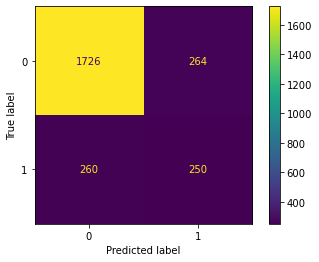

In [95]:
# log model using Threshold
threshold = 0.31
y_log_prob =  log_model.predict_proba(x_test)
y_train_log_prob = log_model.predict_proba(x_train)
y_log_prob=y_log_prob[:,1]
y_train_log_prob= y_train_log_prob[:,1]
y_pred_log_prob = np.where(y_log_prob>threshold,1,0)
y_pred_log_prob_train = np.where(y_train_log_prob>threshold,1,0)
res(y_pred_log_prob,y_pred_log_prob_train)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1990
           1       0.72      0.45      0.55       510

    accuracy                           0.85      2500
   macro avg       0.79      0.70      0.73      2500
weighted avg       0.84      0.85      0.84      2500

train_accuracy: 0.874
test_accuracy: 0.8508


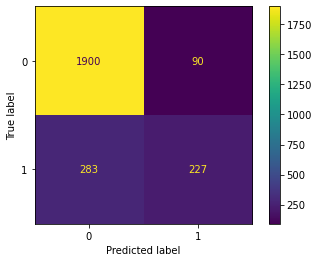

In [97]:
# DecisionTree 
dec_model = DecisionTreeClassifier(max_depth=8, max_features=6,min_samples_leaf=1, min_samples_split=3)
dec_model.fit(x_train,y_train)
y_pred_dec = dec_model.predict(x_test)
y_pred_dec_train = dec_model.predict(x_train)
res(y_pred_dec,y_pred_dec_train)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1990
           1       0.48      0.75      0.58       510

    accuracy                           0.78      2500
   macro avg       0.70      0.77      0.72      2500
weighted avg       0.83      0.78      0.80      2500

train_accuracy: 0.7962666666666667
test_accuracy: 0.7808


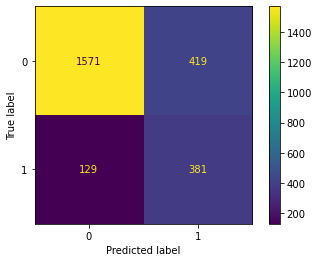

In [101]:
# Fit SVM with RBF Kernel
# use penalized learning algorithms that increase the cost of classification mistakes on the minority class.
svm_model = SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
y_pred_svm_train = svm_model.predict(x_train)
res(y_pred_svm,y_pred_svm_train)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1990
           1       0.77      0.45      0.57       510

    accuracy                           0.86      2500
   macro avg       0.82      0.71      0.74      2500
weighted avg       0.85      0.86      0.85      2500

train_accuracy: 0.8856
test_accuracy: 0.8604


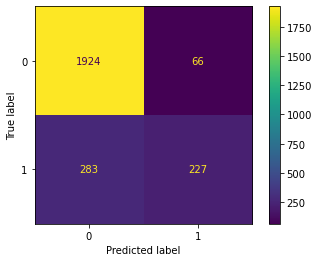

In [99]:
# Fit Random Forest classifier
rf_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_rf_train = rf_model.predict(x_train)
res(y_pred_rf,y_pred_rf_train)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1990
           1       0.63      0.32      0.43       510

    accuracy                           0.82      2500
   macro avg       0.74      0.64      0.66      2500
weighted avg       0.80      0.82      0.80      2500

train_accuracy: 0.8282666666666667
test_accuracy: 0.8232


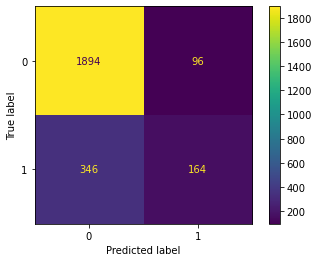

In [104]:
# Naive Baiyes
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
y_pred_nb = nb_model.predict(x_test)
y_pred_nb_train = nb_model.predict(x_train)
res(y_pred_nb,y_pred_nb_train)

[20:48:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1990
           1       0.69      0.49      0.58       510

    accuracy                           0.85      2500
   macro avg       0.79      0.72      0.74      2500
weighted avg       0.84      0.85      0.84      2500

train_accuracy: 0.9508
test_accuracy: 0.8524


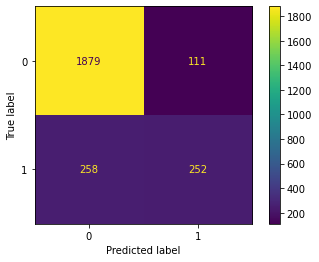

In [108]:
# Fit Extreme Gradient Boost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
xgb_y_predict = xgb_model.predict(x_test)
xgb_y_predict_train = xgb_model.predict(x_train)
res(xgb_y_predict,xgb_y_predict_train)

# XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
#                     min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
#                     reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
# XGB.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

### By reviewing best model fit accuracy : Keen interest is on the performance in predicting 1's (Customers who churn)

### From the above results, my main aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the 1's is of more importance to me than the overall accuracy score of the model.

### Given that in the data we only had 20% of churn, a recall greater than this baseline will already be an improvement but we want to get as high as possible while trying to maintain a high precision so that the bank can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives.

### From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the SVM where according to the fit on the training set, with a precision score on 1's of 0.48 and with the recall score of 0.75 on the 1's.

### Test model prediction accuracy on test data

In [113]:
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

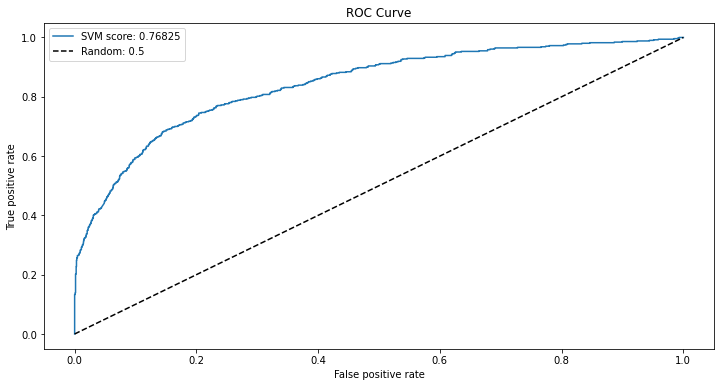

In [117]:
auc_svm_test, fpr_svm_test, tpr_svm_test = get_auc_scores(y_test, svm_model.predict(x_test),
                                                       svm_model.predict_proba(x_test)[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_svm_test, tpr_svm_test, label = 'SVM score: ' + str(round(auc_svm_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

# Synthetic Minority Oversampling Technique (SMOTE)

In [121]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 7963, 1: 2037})
Resample dataset shape Counter({1: 7963, 0: 7963})


              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1534
           1       0.80      0.78      0.79      1652

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186

train_accuracy: 0.8021978021978022
test_accuracy: 0.7862523540489642


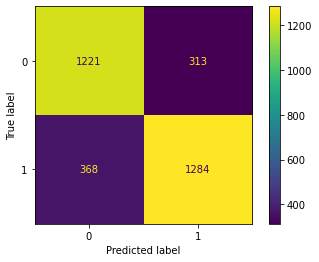

In [122]:
x_train,x_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size=0.20, random_state=1)

svm_model = SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
y_pred_svm_train = svm_model.predict(x_train)
res(y_pred_svm,y_pred_svm_train)

## Conclusion

From using SMOTE we can see our accuracy as well as recall and precision ratio are give equal ratio
Though all the above models performs well, based on the its accuracy but in a imbalance dataset like this,
we actually prefer to change the performance metrics

Hence we can conclde that if we use resample technique we will get better result